# Reinforcement Learning

**Deterministic and Stochastic Environments**

\- Vaibhav Rao
  50375332



In [1]:
! pip install gym

#### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces

In [3]:
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 20
        
    def reset(self):
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        self.trap = [2, 0]
        self.food = [1,2]
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        self.state[tuple(self.trap)] = 0.3
        self.state[tuple(self.food)] = 0.1
        observation = self.state.flatten()
        return observation
    
    def step(self, action):
        self.prev_state = list(self.agent_pos)
        # Move DOWN
        if action == 0:
          self.agent_pos[0] += 1
        # Move UP
        if action == 1:
          self.agent_pos[0] -= 1
        # Move Right
        if action == 2:
          self.agent_pos[1] += 1
        # Move Left
        if action == 3:
          self.agent_pos[1] -= 1
          
        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        self.state[tuple(self.trap)] = 0.3
        self.state[tuple(self.food)] = 0.1
        observation = self.state.flatten()
        
        reward = 0
        if (self.agent_pos == self.goal_pos).all():
          reward = 30
        if (self.agent_pos == self.trap).all():
          reward = -5
        if (self.agent_pos == self.food).all():
          reward = 2
        if (self.agent_pos == self.prev_state).all():
          reward = -1
        
        
        self.timestep += 1
        done = True if self.timestep >= self.max_timesteps else False
        info = {}
        
        return observation, reward, done, info

    def step_stochastic(self, action):
        self.prev_state = list(self.agent_pos)
        self.same_pos_reward = True
        # Move DOWN (Stochastic with 0.1 probability of not moving)
        if action == 0:
          stoch_step = np.random.choice([1, 0], p=[0.9,0.1])
          self.agent_pos[0] += stoch_step
          if not stoch_step:
            self.same_pos_reward = False
        # Move UP
        if action == 1:
          self.agent_pos[0] -= 1
        # Move Right
        if action == 2:
          self.agent_pos[1] += 1
        # Move Left (Probability of not taking a left in this action = 0.3)
        if action == 3:
          stoch_step = np.random.choice([1, 0], p=[0.7,0.3])
          self.agent_pos[1] -= stoch_step
          if not stoch_step:
            self.same_pos_reward = False

        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        self.state[tuple(self.trap)] = 0.3
        self.state[tuple(self.food)] = 0.1
        observation = self.state.flatten()
        
        reward = 0
        if (self.agent_pos == self.goal_pos).all():
          reward = 10
        if (self.agent_pos == self.trap).all():
          reward = -5
        if (self.agent_pos == self.food).all():
          reward = 2
        if (self.agent_pos == self.prev_state).all() and self.same_pos_reward:
          reward = -1
        
        
        self.timestep += 1
        done = True if self.timestep >= self.max_timesteps else False
        info = {}
        
        return observation, reward, done, info


    def render(self):
        plt.imshow(self.state)


#### Grid Environment Class

Methods 
- step (Deterministic Environment)
- step_stochastic (Stochastic Environment)

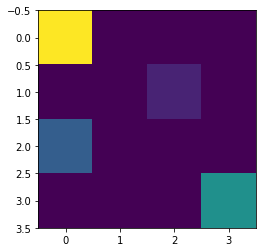

In [4]:
env = GridEnvironment()
obs = env.reset()
env.render()

#### Manual check to verify environment

0


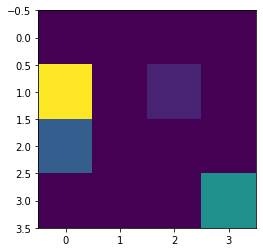

In [5]:
#action = 0
action = 0
observation, reward, done, _ = env.step(action)
#observation, reward, done, _ = env.step_stochastic(action)
env.render()
print(reward)

In [6]:
class RandomAgent:

  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, observation):
    return np.random.choice(self.action_space.n)

## Define Random agent to move in some direction from our Action Space

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 1 Up  Reward:  -1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 3 Left  Reward:  -1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 3 Left  Reward:  -1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 1 Up  Reward:  -1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 1 Up  Reward:  -1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 0 Down  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 3 Left  Reward:  -1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 0 Down  Reward:  -5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 1 Up  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

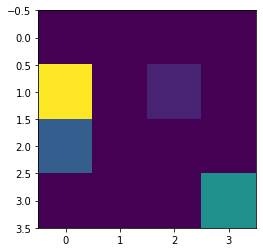

<IPython.core.display.Javascript object>

Action: 3 Left  Reward:  -1


In [7]:
from google.colab import widgets
import time

env = GridEnvironment()
agent = RandomAgent(env)

obs = env.reset()
done = False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

action_name_dict = {0:'Down', 1:'Up', 2:'Right', 3:'Left'}
# 10 Steps in a Deterministic Environment
for _ in range(10):
  action = agent.step(obs)
  obs, reward, done, _ = env.step(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  print('Action:', action, action_name_dict[action], ' Reward: ', reward)
  time.sleep(1)   

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 1 Up  Reward:  -1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 0 Down  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 1 Up  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 0 Down  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 1 Up  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 3 Left  Reward:  -1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 3 Left  Reward:  -1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 1 Up  Reward:  -1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 0 Down  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

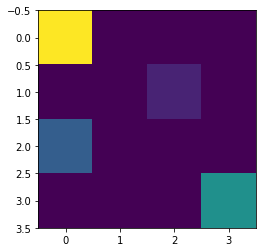

<IPython.core.display.Javascript object>

Action: 1 Up  Reward:  0


In [8]:
obs = env.reset()
done = False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

action_name_dict = {0:'Down', 1:'Up', 2:'Right', 3:'Left'}
# 10 Steps in a Deterministic Environment
for _ in range(10):
  action = agent.step(obs)
  obs, reward, done, _ = env.step_stochastic(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  print('Action:', action, action_name_dict[action], ' Reward: ', reward)
  time.sleep(1)   

# Q LEARNING

### Q-Learning Deterministic Environment

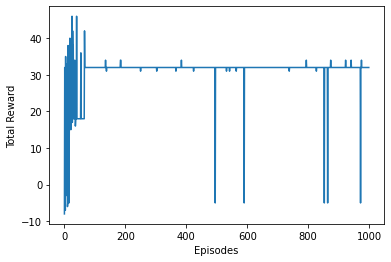

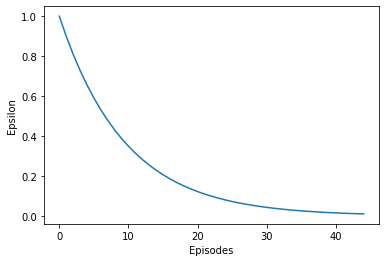

In [9]:
env = GridEnvironment()


q_table_Q_det = np.zeros([env.observation_space.n, env.action_space.n])  
alpha = 0.1
gamma = 0.5
epsilon = 1
epsilon_decay = [epsilon]
reward_per_episode_q_det=[]
episodes = 1000

for episode in range(episodes):
  obs = env.reset()
  total_reward = 0 
  is_terminal = False
  done = False
  while not done and is_terminal != True:
    #Current x,y coordinates
    old_state = env.agent_pos
    #Calculate actual state from x,y coords, eg state 0-15
    old_state = old_state[0]*4 + old_state[1] 
    #Random Actions for the first few epsiodes 
    if np.random.uniform(0,1) <= epsilon:
      action = np.random.choice(env.action_space.n)
    else:
      max = np.max(q_table_Q_det[old_state])
      action = np.random.choice(np.where(q_table_Q_det[old_state] == max)[0])
    
    obs, reward, done, _ = env.step(action)
    next_state = env.agent_pos
    next_state = next_state[0]*4 + next_state[1]

    #Update Q values
    q_prev = q_table_Q_det[old_state][action]
    max_next = np.max(q_table_Q_det[next_state])
    q_table_Q_det[old_state,action] = q_prev + (alpha * (reward + (gamma * max_next) - q_prev))
    #print("Qtable after learn",q_table_Q_det)
    total_reward += reward
    
    if (env.agent_pos == env.goal_pos).all() or (env.agent_pos == env.trap).all():
      #Agent died or reached goal. Finsh Step, Reset Environment
      is_terminal = True

  # Decay Epsilon rate for every episode.
  if epsilon >= 0.01:
    epsilon *= 0.9
    epsilon_decay.append(epsilon)
  
  #Append Total reward of the Episode.
  reward_per_episode_q_det.append(total_reward) # Append reward for current trial to performance log
    
plt.plot(reward_per_episode_q_det)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.show()


plt.plot(epsilon_decay)
plt.xlabel('Episodes')
plt.ylabel('Epsilon')
plt.show()

#### Running the agent on Learnt Q-Table for Qlearnng Deterministic Environment

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 0 Down  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 2 Right  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 2 Right  Reward:  2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 0 Down  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 2 Right  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 0 Down  Reward:  30


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 1 Up  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 0 Down  Reward:  30


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 0 Down  Reward:  -1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

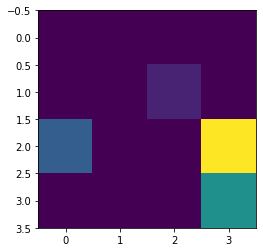

<IPython.core.display.Javascript object>

Action: 1 Up  Reward:  0


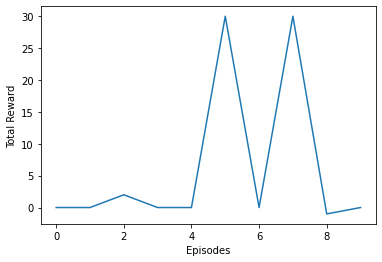

In [10]:
obs = env.reset()
done = False
total_reward =[]
output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

action_name_dict = {0:'Down', 1:'Up', 2:'Right', 3:'Left'}
# 10 Steps in a Deterministic Environment
for _ in range(10):
  old_state = env.agent_pos
  #Calculate actual state from x,y coords, eg state 0-15
  old_state = old_state[0]*4 + old_state[1] 
  max = np.max(q_table_Q_det[old_state])
  action = np.random.choice(np.where(q_table_Q_det[old_state] == max)[0])
  obs, reward, done, _ = env.step(action)
  total_reward.append(reward)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  print('Action:', action, action_name_dict[action], ' Reward: ', reward)
  time.sleep(1)   

plt.plot(total_reward)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.show()


### Q-Learning Stochastic Environment

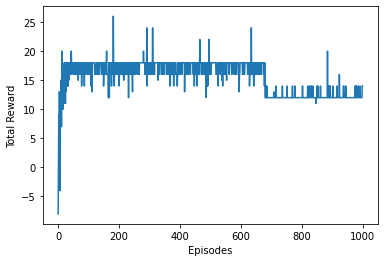

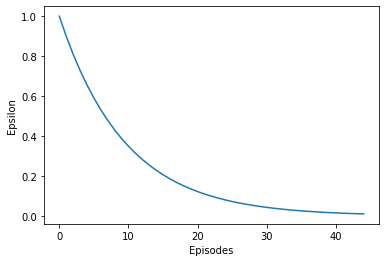

In [11]:
env = GridEnvironment()

q_table_Q_stoch = np.zeros([env.observation_space.n, env.action_space.n])  
alpha = 0.1
gamma = 0.5
epsilon = 1
epsilon_decay = [epsilon]
reward_per_episode_q_stoch=[]
episodes = 1000

for episode in range(episodes):
  obs = env.reset()
  total_reward = 0 
  is_terminal = False
  done = False
  while not done and is_terminal != True:
    #Current x,y coordinates
    old_state = env.agent_pos
    #Calculate actual state from x,y coords, eg state 0-15
    old_state = old_state[0]*4 + old_state[1] 
    #Random Actions for the first few epsiodes 
    if np.random.uniform(0,1) <= epsilon:
      action = np.random.choice(env.action_space.n)
    else:
      max = np.max(q_table_Q_stoch[old_state])
      action = np.random.choice(np.where(q_table_Q_stoch[old_state] == max)[0])
    
    ## step_stochastic Function for Stochastic Action
    obs, reward, done, _ = env.step_stochastic(action)
    next_state = env.agent_pos
    next_state = next_state[0]*4 + next_state[1]

    #Update Q values
    q_prev = q_table_Q_stoch[old_state][action]
    max_next = np.max(q_table_Q_stoch[next_state])
    q_table_Q_stoch[old_state,action] = q_prev + (alpha * (reward + (gamma * max_next) - q_prev))
    #print("Qtable after learn",q_table_Q_stoch)
    total_reward += reward
    
    if (env.agent_pos == env.goal_pos).all() or (env.agent_pos == env.trap).all():
      #Agent died or reached goal. Finsh Step, Reset Environment
      is_terminal = True

  # Decay Epsilon rate for every episode.
  if epsilon >= 0.01:
    epsilon *= 0.9
    epsilon_decay.append(epsilon)
  
  #Append Total reward of the Episode.
  reward_per_episode_q_stoch.append(total_reward) # Append reward for current trial to performance log
    
plt.plot(reward_per_episode_q_stoch)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.show()

plt.plot(epsilon_decay)
plt.xlabel('Episodes')
plt.ylabel('Epsilon')
plt.show()

#### Running the agent on Learnt Q-Table for Qlearnng Stochastic Environment

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 2 Right  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 2 Right  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 0 Down  Reward:  2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 0 Down  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 2 Right  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 0 Down  Reward:  10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 0 Down  Reward:  -1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 0 Down  Reward:  -1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 2 Right  Reward:  -1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

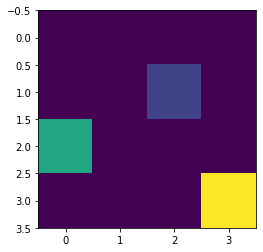

<IPython.core.display.Javascript object>

Action: 2 Right  Reward:  -1


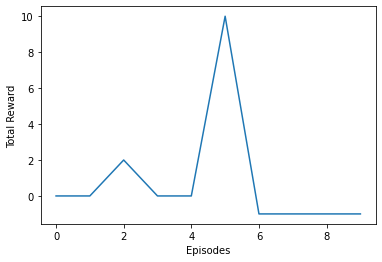

In [12]:
obs = env.reset()
done = False
total_reward =[]
output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

action_name_dict = {0:'Down', 1:'Up', 2:'Right', 3:'Left'}
# 10 Steps in a Stochastic Environment
for _ in range(10):
  old_state = env.agent_pos
  #Calculate actual state from x,y coords, eg state 0-15
  old_state = old_state[0]*4 + old_state[1] 
  
  max = np.max(q_table_Q_stoch[old_state])
  action = np.random.choice(np.where(q_table_Q_stoch[old_state] == max)[0])

  obs, reward, done, _ = env.step_stochastic(action)
  
  total_reward.append(reward)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  print('Action:', action, action_name_dict[action], ' Reward: ', reward)
  time.sleep(1)   

plt.plot(total_reward)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.show()

## SARSA 

### SARSA on Deterministic Environment

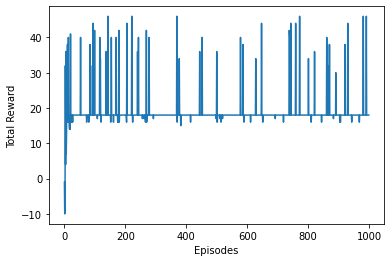

In [13]:
env = GridEnvironment()


q_table_sarsadet = np.zeros([env.observation_space.n, env.action_space.n])  
alpha = 0.1
gamma = 0.5
epsilon = 1
reward_per_episode_sarsa_det=[]
episodes = 1000

for episode in range(episodes):
  obs = env.reset()
  total_reward = 0 
  is_terminal = False
  done = False
  while not done and is_terminal != True:
    #Current x,y coordinates
    old_state = env.agent_pos
    #Calculate actual state from x,y coords, eg state 0-15
    old_state = old_state[0]*4 + old_state[1] 
    #Random Actions for the first few epsiodes 
    if np.random.uniform(0,1) <= epsilon:
      action = np.random.choice(env.action_space.n)
    else:
      max = np.max(q_table_sarsadet[old_state])
      action = np.random.choice(np.where(q_table_sarsadet[old_state] == max)[0])
    
    obs, reward, done, _ = env.step(action)
    next_state = env.agent_pos
    next_state = next_state[0]*4 + next_state[1]

    #Update Q values
    q_prev = q_table_sarsadet[old_state][action]
    q_table_sarsadet[old_state,action] = q_prev + (alpha * (reward + (gamma * q_table_sarsadet[next_state][action]) - q_prev))
    #print("Qtable after learn",q_table_sarsadet)
    total_reward += reward
    
    if (env.agent_pos == env.goal_pos).all() or (env.agent_pos == env.trap).all():
      #Agent died or reached goal. Finsh Step, Reset Environment
      is_terminal = True

  # Decay Epsilon rate for every episode.
  if epsilon >= 0.01:
    epsilon *= 0.9
  
  #Append Total reward of the Episode.
  reward_per_episode_sarsa_det.append(total_reward) # Append reward for current trial to performance log
    
plt.plot(reward_per_episode_sarsa_det)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.show()

#### Running the agent on Learnt Q-Table for SARSA in a Deterministic Environment

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 2 Right  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 0 Down  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 2 Right  Reward:  2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 0 Down  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 1 Up  Reward:  2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 0 Down  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 1 Up  Reward:  2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 0 Down  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 1 Up  Reward:  2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

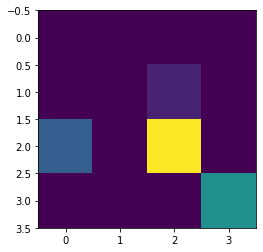

<IPython.core.display.Javascript object>

Action: 0 Down  Reward:  0


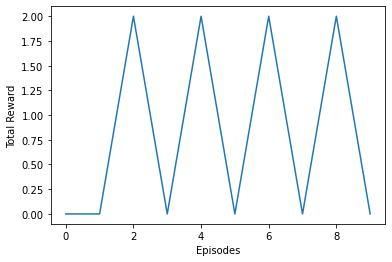

In [25]:
obs = env.reset()
done = False
total_reward =[]
output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

action_name_dict = {0:'Down', 1:'Up', 2:'Right', 3:'Left'}
# 10 Steps in a Stochastic Environment
for _ in range(10):
  old_state = env.agent_pos
  #Calculate actual state from x,y coords, eg state 0-15
  old_state = old_state[0]*4 + old_state[1] 
  
  max = np.max(q_table_sarsadet[old_state])
  action = np.random.choice(np.where(q_table_sarsadet[old_state] == max)[0])

  obs, reward, done, _ = env.step(action)
  
  total_reward.append(reward)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  print('Action:', action, action_name_dict[action], ' Reward: ', reward)
  time.sleep(1)   

plt.plot(total_reward)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.show()

### Sarsa on Stochastic Environment

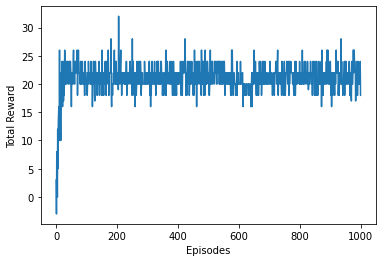

In [15]:
env = GridEnvironment()


q_table_sarsastoch = np.zeros([env.observation_space.n, env.action_space.n])  
alpha = 0.1
gamma = 0.5
epsilon = 1
reward_per_episode_sarsastoch=[]
episodes = 1000

for episode in range(episodes):
  obs = env.reset()
  total_reward = 0 
  is_terminal = False
  done = False
  while not done and is_terminal != True:
    #Current x,y coordinates
    old_state = env.agent_pos
    #Calculate actual state from x,y coords, eg state 0-15
    old_state = old_state[0]*4 + old_state[1] 
    #Random Actions for the first few epsiodes 
    if np.random.uniform(0,1) <= epsilon:
      action = np.random.choice(env.action_space.n)
    else:
      max = np.max(q_table_sarsastoch[old_state])
      action = np.random.choice(np.where(q_table_sarsastoch[old_state] == max)[0])
    
    obs, reward, done, _ = env.step_stochastic(action)
    next_state = env.agent_pos
    next_state = next_state[0]*4 + next_state[1]

    #Update Q values
    q_prev = q_table_sarsastoch[old_state][action]
    q_table_sarsastoch[old_state,action] = q_prev + (alpha * (reward + (gamma * q_table_sarsastoch[next_state][action]) - q_prev))
    #print("Qtable after learn",q_table_sarsastoch)
    total_reward += reward
    
    if (env.agent_pos == env.goal_pos).all() or (env.agent_pos == env.trap).all():
      #Agent died or reached goal. Finsh Step, Reset Environment
      is_terminal = True

  # Decay Epsilon rate for every episode.
  if epsilon >= 0.01:
    epsilon *= 0.9
  
  #Append Total reward of the Episode.
  reward_per_episode_sarsastoch.append(total_reward) # Append reward for current trial to performance log
    
plt.plot(reward_per_episode_sarsastoch)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.show()

#### Running the agent on Learnt Q-Table for SARSA in a Stochastic Environment

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 2 Right  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 0 Down  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 2 Right  Reward:  2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 3 Left  Reward:  2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 3 Left  Reward:  2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 3 Left  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 2 Right  Reward:  2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 3 Left  Reward:  2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action: 3 Left  Reward:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

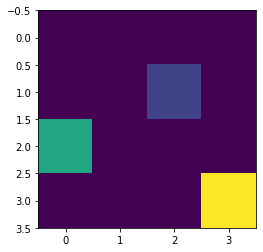

<IPython.core.display.Javascript object>

Action: 2 Right  Reward:  2


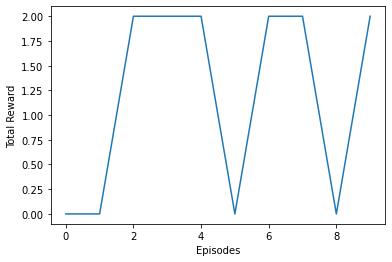

In [16]:
obs = env.reset()
done = False
total_reward =[]
output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

action_name_dict = {0:'Down', 1:'Up', 2:'Right', 3:'Left'}
# 10 Steps in a Stochastic Environment
for _ in range(10):
  old_state = env.agent_pos
  #Calculate actual state from x,y coords, eg state 0-15
  old_state = old_state[0]*4 + old_state[1] 
  
  max = np.max(q_table_sarsastoch[old_state])
  action = np.random.choice(np.where(q_table_sarsastoch[old_state] == max)[0])

  obs, reward, done, _ = env.step_stochastic(action)
  
  total_reward.append(reward)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  print('Action:', action, action_name_dict[action], ' Reward: ', reward)
  time.sleep(1)   

plt.plot(total_reward)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.show()

## 2. Compare SARSA and Q-Learning on Deterministic Environment.
Plotting the rewards of both algorithms in a deterministic Environment

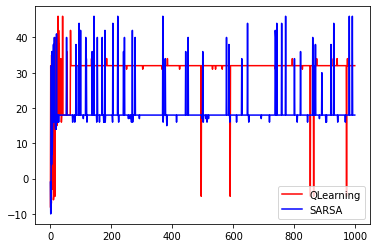

In [17]:
line1, = plt.plot(reward_per_episode_q_det, label="QLearning", color="r")
line2, = plt.plot(reward_per_episode_sarsa_det, label="SARSA", color="b")

plt.legend(handles=[line1, line2], loc="lower right")
plt.show()


## 3. Compare SARSA and Q-Learning on Stochastic Environment.
Plotting the rewards of both algorithms in a Stochastic Environment

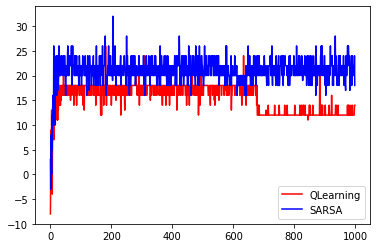

In [18]:
line1, = plt.plot(reward_per_episode_q_stoch, label="QLearning", color="r")
line2, = plt.plot(reward_per_episode_sarsastoch, label="SARSA", color="b")

plt.legend(handles=[line1, line2], loc="lower right")
plt.show()


## BONUS

Hyper Parameter Tuning

#### A - Tuning number of episodes.

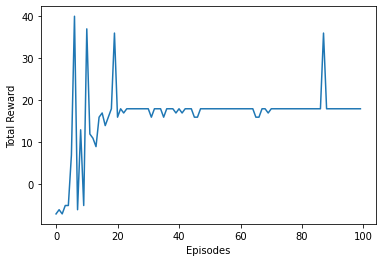

In [19]:
env = GridEnvironment()


q_table_Q_det = np.zeros([env.observation_space.n, env.action_space.n])  
alpha = 0.1
gamma = 0.5
epsilon = 1
epsilon_decay = [epsilon]
reward_per_episode_q_det=[]
episodes = 100

for episode in range(episodes):
  obs = env.reset()
  total_reward = 0 
  is_terminal = False
  done = False
  while not done and is_terminal != True:
    #Current x,y coordinates
    old_state = env.agent_pos
    #Calculate actual state from x,y coords, eg state 0-15
    old_state = old_state[0]*4 + old_state[1] 
    #Random Actions for the first few epsiodes 
    if np.random.uniform(0,1) <= epsilon:
      action = np.random.choice(env.action_space.n)
    else:
      max = np.max(q_table_Q_det[old_state])
      action = np.random.choice(np.where(q_table_Q_det[old_state] == max)[0])
    
    obs, reward, done, _ = env.step(action)
    next_state = env.agent_pos
    next_state = next_state[0]*4 + next_state[1]

    #Update Q values
    q_prev = q_table_Q_det[old_state][action]
    max_next = np.max(q_table_Q_det[next_state])
    q_table_Q_det[old_state,action] = q_prev + (alpha * (reward + (gamma * max_next) - q_prev))
    #print("Qtable after learn",q_table_Q_det)
    total_reward += reward
    
    if (env.agent_pos == env.goal_pos).all() or (env.agent_pos == env.trap).all():
      #Agent died or reached goal. Finsh Step, Reset Environment
      is_terminal = True

  # Decay Epsilon rate for every episode.
  if epsilon >= 0.01:
    epsilon *= 0.9
    epsilon_decay.append(epsilon)
  
  #Append Total reward of the Episode.
  reward_per_episode_q_det.append(total_reward) # Append reward for current trial to performance log
    
plt.plot(reward_per_episode_q_det)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.show()


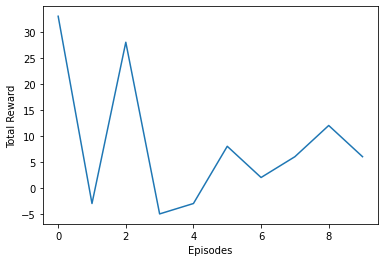

In [20]:
env = GridEnvironment()


q_table_Q_det = np.zeros([env.observation_space.n, env.action_space.n])  
alpha = 0.1
gamma = 0.5
epsilon = 1
epsilon_decay = [epsilon]
reward_per_episode_q_det=[]
episodes = 10

for episode in range(episodes):
  obs = env.reset()
  total_reward = 0 
  is_terminal = False
  done = False
  while not done and is_terminal != True:
    #Current x,y coordinates
    old_state = env.agent_pos
    #Calculate actual state from x,y coords, eg state 0-15
    old_state = old_state[0]*4 + old_state[1] 
    #Random Actions for the first few epsiodes 
    if np.random.uniform(0,1) <= epsilon:
      action = np.random.choice(env.action_space.n)
    else:
      max = np.max(q_table_Q_det[old_state])
      action = np.random.choice(np.where(q_table_Q_det[old_state] == max)[0])
    
    obs, reward, done, _ = env.step(action)
    next_state = env.agent_pos
    next_state = next_state[0]*4 + next_state[1]

    #Update Q values
    q_prev = q_table_Q_det[old_state][action]
    max_next = np.max(q_table_Q_det[next_state])
    q_table_Q_det[old_state,action] = q_prev + (alpha * (reward + (gamma * max_next) - q_prev))
    #print("Qtable after learn",q_table_Q_det)
    total_reward += reward
    
    if (env.agent_pos == env.goal_pos).all() or (env.agent_pos == env.trap).all():
      #Agent died or reached goal. Finsh Step, Reset Environment
      is_terminal = True

  # Decay Epsilon rate for every episode.
  if epsilon >= 0.01:
    epsilon *= 0.9
    epsilon_decay.append(epsilon)
  
  #Append Total reward of the Episode.
  reward_per_episode_q_det.append(total_reward) # Append reward for current trial to performance log
    
plt.plot(reward_per_episode_q_det)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.show()


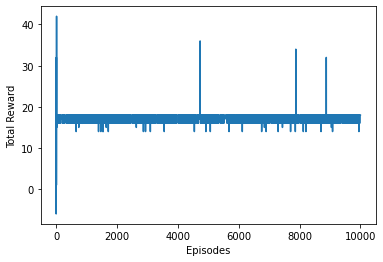

In [21]:
env = GridEnvironment()


q_table_Q_det = np.zeros([env.observation_space.n, env.action_space.n])  
alpha = 0.1
gamma = 0.5
epsilon = 1
reward_per_episode_q_det=[]
episodes = 10000

for episode in range(episodes):
  obs = env.reset()
  total_reward = 0 
  is_terminal = False
  done = False
  while not done and is_terminal != True:
    #Current x,y coordinates
    old_state = env.agent_pos
    #Calculate actual state from x,y coords, eg state 0-15
    old_state = old_state[0]*4 + old_state[1] 
    #Random Actions for the first few epsiodes 
    if np.random.uniform(0,1) <= epsilon:
      action = np.random.choice(env.action_space.n)
    else:
      max = np.max(q_table_Q_det[old_state])
      action = np.random.choice(np.where(q_table_Q_det[old_state] == max)[0])
    
    obs, reward, done, _ = env.step(action)
    next_state = env.agent_pos
    next_state = next_state[0]*4 + next_state[1]

    #Update Q values
    q_prev = q_table_Q_det[old_state][action]
    max_next = np.max(q_table_Q_det[next_state])
    q_table_Q_det[old_state,action] = q_prev + (alpha * (reward + (gamma * max_next) - q_prev))
    #print("Qtable after learn",q_table_Q_det)
    total_reward += reward
    
    if (env.agent_pos == env.goal_pos).all() or (env.agent_pos == env.trap).all():
      #Agent died or reached goal. Finsh Step, Reset Environment
      is_terminal = True

  # Decay Epsilon rate for every episode.
  if epsilon >= 0.01:
    epsilon *= 0.9
  
  #Append Total reward of the Episode.
  reward_per_episode_q_det.append(total_reward) # Append reward for current trial to performance log
    
plt.plot(reward_per_episode_q_det)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.show()


Comparing Results of changing the Number of Episodes, We can observe from the graph that episode = 10 is very low for our model to converge.

Choosing 1000 and 10000, we can notice, that the model converges way before these many episode, Hence they are not really required. So our current chose 100 episodes is perfect for our grid environment

#### B - Tuning the Discount Factor - Gamma

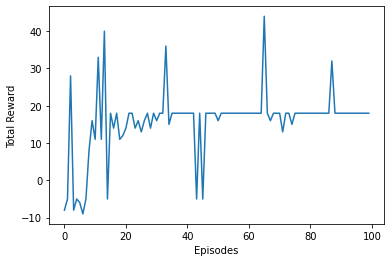

In [22]:
env = GridEnvironment()


q_table_Q_det = np.zeros([env.observation_space.n, env.action_space.n])  
alpha = 0.1
gamma = 0.2
epsilon = 1
epsilon_decay = [epsilon]
reward_per_episode_q_det=[]
episodes = 100

for episode in range(episodes):
  obs = env.reset()
  total_reward = 0 
  is_terminal = False
  done = False
  while not done and is_terminal != True:
    #Current x,y coordinates
    old_state = env.agent_pos
    #Calculate actual state from x,y coords, eg state 0-15
    old_state = old_state[0]*4 + old_state[1] 
    #Random Actions for the first few epsiodes 
    if np.random.uniform(0,1) <= epsilon:
      action = np.random.choice(env.action_space.n)
    else:
      max = np.max(q_table_Q_det[old_state])
      action = np.random.choice(np.where(q_table_Q_det[old_state] == max)[0])
    
    obs, reward, done, _ = env.step(action)
    next_state = env.agent_pos
    next_state = next_state[0]*4 + next_state[1]

    #Update Q values
    q_prev = q_table_Q_det[old_state][action]
    max_next = np.max(q_table_Q_det[next_state])
    q_table_Q_det[old_state,action] = q_prev + (alpha * (reward + (gamma * max_next) - q_prev))
    #print("Qtable after learn",q_table_Q_det)
    total_reward += reward
    
    if (env.agent_pos == env.goal_pos).all() or (env.agent_pos == env.trap).all():
      #Agent died or reached goal. Finsh Step, Reset Environment
      is_terminal = True

  # Decay Epsilon rate for every episode.
  if epsilon >= 0.01:
    epsilon *= 0.9
    epsilon_decay.append(epsilon)
  
  #Append Total reward of the Episode.
  reward_per_episode_q_det.append(total_reward) # Append reward for current trial to performance log
    
plt.plot(reward_per_episode_q_det)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.show()


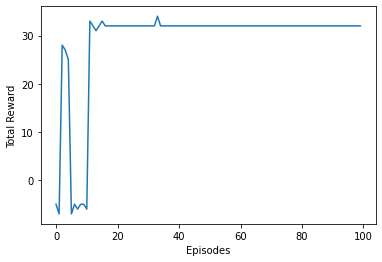

In [23]:
env = GridEnvironment()


q_table_Q_det = np.zeros([env.observation_space.n, env.action_space.n])  
alpha = 0.1
gamma = 0.9
epsilon = 1
epsilon_decay = [epsilon]
reward_per_episode_q_det=[]
episodes = 100

for episode in range(episodes):
  obs = env.reset()
  total_reward = 0 
  is_terminal = False
  done = False
  while not done and is_terminal != True:
    #Current x,y coordinates
    old_state = env.agent_pos
    #Calculate actual state from x,y coords, eg state 0-15
    old_state = old_state[0]*4 + old_state[1] 
    #Random Actions for the first few epsiodes 
    if np.random.uniform(0,1) <= epsilon:
      action = np.random.choice(env.action_space.n)
    else:
      max = np.max(q_table_Q_det[old_state])
      action = np.random.choice(np.where(q_table_Q_det[old_state] == max)[0])
    
    obs, reward, done, _ = env.step(action)
    next_state = env.agent_pos
    next_state = next_state[0]*4 + next_state[1]

    #Update Q values
    q_prev = q_table_Q_det[old_state][action]
    max_next = np.max(q_table_Q_det[next_state])
    q_table_Q_det[old_state,action] = q_prev + (alpha * (reward + (gamma * max_next) - q_prev))
    #print("Qtable after learn",q_table_Q_det)
    total_reward += reward
    
    if (env.agent_pos == env.goal_pos).all() or (env.agent_pos == env.trap).all():
      #Agent died or reached goal. Finsh Step, Reset Environment
      is_terminal = True

  # Decay Epsilon rate for every episode.
  if epsilon >= 0.01:
    epsilon *= 0.9
    epsilon_decay.append(epsilon)
  
  #Append Total reward of the Episode.
  reward_per_episode_q_det.append(total_reward) # Append reward for current trial to performance log
    
plt.plot(reward_per_episode_q_det)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.show()


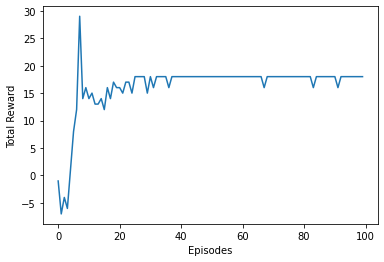

In [26]:
env = GridEnvironment()


q_table_Q_det = np.zeros([env.observation_space.n, env.action_space.n])  
alpha = 0.1
gamma = 0.1
epsilon = 1
epsilon_decay = [epsilon]
reward_per_episode_q_det=[]
episodes = 100

for episode in range(episodes):
  obs = env.reset()
  total_reward = 0 
  is_terminal = False
  done = False
  while not done and is_terminal != True:
    #Current x,y coordinates
    old_state = env.agent_pos
    #Calculate actual state from x,y coords, eg state 0-15
    old_state = old_state[0]*4 + old_state[1] 
    #Random Actions for the first few epsiodes 
    if np.random.uniform(0,1) <= epsilon:
      action = np.random.choice(env.action_space.n)
    else:
      max = np.max(q_table_Q_det[old_state])
      action = np.random.choice(np.where(q_table_Q_det[old_state] == max)[0])
    
    obs, reward, done, _ = env.step(action)
    next_state = env.agent_pos
    next_state = next_state[0]*4 + next_state[1]

    #Update Q values
    q_prev = q_table_Q_det[old_state][action]
    max_next = np.max(q_table_Q_det[next_state])
    q_table_Q_det[old_state,action] = q_prev + (alpha * (reward + (gamma * max_next) - q_prev))
    #print("Qtable after learn",q_table_Q_det)
    total_reward += reward
    
    if (env.agent_pos == env.goal_pos).all() or (env.agent_pos == env.trap).all():
      #Agent died or reached goal. Finsh Step, Reset Environment
      is_terminal = True

  # Decay Epsilon rate for every episode.
  if epsilon >= 0.01:
    epsilon *= 0.9
    epsilon_decay.append(epsilon)
  
  #Append Total reward of the Episode.
  reward_per_episode_q_det.append(total_reward) # Append reward for current trial to performance log
    
plt.plot(reward_per_episode_q_det)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.show()
